<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/13_rock_scissor_paper_05112023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric

|평가문항	|상세기준| 내평가|
|--|--|--|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?	|학습과정이 정상적으로 수행되었으며,  </br>학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음|O|
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?	|오버피팅 극복을 위하여   </br>데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음|O|
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|	60% 이상 도달하였음|O|

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [ ]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# Unzip , Rename & Move file

In [ ]:
import zipfile

def un_zip(dir_name):
    for i in 'paper', 'scissor', 'rock':
        for j in '5':
            zip_file = zipfile.ZipFile(os.getenv("HOME") + dir_name +i+"/" + i + j + ".zip")
            os.makedirs(os.getenv("HOME") + dir_name +i+"/" + i + j)
            new_dir = os.getenv("HOME") + dir_name +i+"/" + i + j
            zip_file.extractall(new_dir)
    

In [ ]:
un_zip('/aiffel/05112023/data_0518/')

In [ ]:
zip_file = zipfile.ZipFile(os.getenv("HOME") + '/aiffel/05112023/data_0518/scissor/scissor3.zip')

new_dir = os.getenv("HOME") +  '/aiffel/05112023/data/scissor'
zip_file.extractall(new_dir)

In [ ]:
# un_zip('/aiffel/05112023/test/','/aiffel/05112023/test/')

In [ ]:
#rename
def rename(no):
    no = str(no)
    for i in 'scissor', 'rock':
        for j in range(100,365):
            k= str(j)
            old_file = os.path.join(os.getenv("HOME") + '/aiffel/05112023/data_0518/' + i +'/'+i+no, k + '.jpg')
            l=str(j+400)
            new_file = os.path.join(os.getenv("HOME") + '/aiffel/05112023/data/'+ i, l +'.jpg')
            os.rename(old_file, new_file)
        

In [ ]:
rename(5)

In [ ]:
# combine files
import shutil
import os
 
src = os.getenv("HOME") + '/aiffel/05112023/data_0518/'
dest = os.getenv("HOME") + '/aiffel/05112023/data/'

for i in 'paper', 'scissor', 'rock':
    src_ = src + i +'/' + i +'2/'
    dest_ = dest + i +'/'
    files = os.listdir(src_)
    for f in files:
        shutil.move(src_ + f, dest_)

In [ ]:
#copy data
src = os.getenv("HOME") + '/aiffel/05112023/data/'
# os.makedirs(os.getenv("HOME") + '/aiffel/05112023/data_copy/')

for i in 'paper', 'scissor', 'rock':
    src_ = src + i +'/'
#     os.makedirs(os.getenv("HOME") + '/aiffel/05112023/data_copy/' + i +'/')
    dest = os.getenv("HOME") + '/aiffel/05112023/data_copy/' + i +'/'
    
#     files = os.listdir(src_)
    for f in files:
        shutil.copytree(dest, src_)

In [ ]:
# remove directory
shutil.rmtree(os.getenv("HOME") + '/aiffel/05112023/data_0518/test/')

# Resize

In [ ]:
def resize_images(img_path):
    for i in 'paper', 'scissor', 'rock':
        images=glob.glob(img_path +i+"/"+"*.jpg")  

        print(len(images), " "+ i+" images to be resized.")

        # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for img in images:
            old_img=Image.open(img)
            new_img=old_img.resize(target_size,Image.ANTIALIAS)
            new_img.save(img, "JPEG")

        print(len(images)," "+ i+ " images resized.")
	


In [ ]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/05112023/data/"
resize_images(image_dir_path)

765  paper images to be resized.
765  paper images resized.
765  scissor images to be resized.
765  scissor images resized.
765  rock images to be resized.
765  rock images resized.


In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/05112023/test/"
resize_images(image_dir_path)

100  paper images to be resized.
100  paper images resized.
100  scissor images to be resized.
100  scissor images resized.
100  rock images to be resized.
100  rock images resized.


# Labeling

In [ ]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/05112023/test"
(X_test, y_test)=load_data(image_dir_path, 300)

학습데이터(x_train)의 이미지 개수는 300 입니다.


In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/05112023/data"
(X, y)=load_data(image_dir_path, 2295)

학습데이터(x_train)의 이미지 개수는 2295 입니다.


# Split

In [ ]:
from sklearn.model_selection import train_test_split

# split train - test 
# X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size= 0.2, random_state=1234)
# print(X_test.shape, y_test.shape)
# split train-validation

X2_train, X_val, y2_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=1234)

X2_train.shape, X_val.shape, X_test.shape

((1836, 28, 28, 3), (459, 28, 28, 3), (300, 28, 28, 3))

라벨:  0


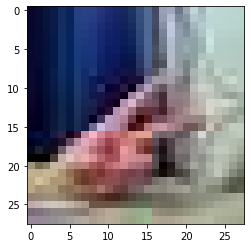

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X2_train[0])
print('라벨: ', y2_train[0])

# Normalization(test)

In [ ]:
x_test_norm = X_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

x_test_norm shape: (300, 28, 28, 3)
y_test shape: (300,)


# with Data Augmentation

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT =28
IMG_WIDTH =28

# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False,
                                     fill_mode='nearest')

train_data_gen = image_gen_train.flow(X2_train, y2_train,
                                      batch_size = 32,
                                      shuffle=True            
#                                                      directory=X2_train, #os.getenv("HOME") + "/aiffel/05112023/data/'                                            shuffle=True,
#                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      class_mode='categorical'
                                     )
# https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

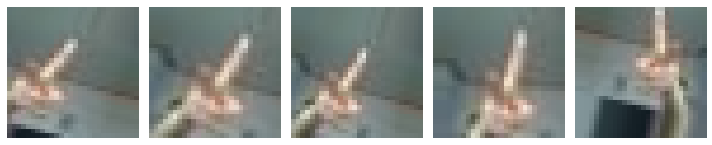

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [ ]:
train_data_gen[0][0].shape

(32, 28, 28, 3)

In [ ]:
len(train_data_gen)

30

In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)  
# train data와 같은 작업을 하는데 classification 때문에 스케일만 변경

In [ ]:
val_data_gen = image_gen_val.flow(X_val, y_val,
                                  batch_size = 32,
                                  shuffle=True 
                                  )

## Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 256)       37120     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 모델 훈련
history = model.fit(train_data_gen,

#                     steps_per_epoch=(len(X2_train))/16,
                    epochs=25,
                    batch_size = 10,
                    validation_data = val_data_gen,
                    validation_freq=1
                   )

Epoch 1/25
58/58 [==============================] - 1s 18ms/step - loss: 1.0762 - accuracy: 0.3960 - val_loss: 1.0123 - val_accuracy: 0.4532
Epoch 2/25
58/58 [==============================] - 1s 14ms/step - loss: 0.9772 - accuracy: 0.4995 - val_loss: 0.8986 - val_accuracy: 0.5207
Epoch 3/25
58/58 [==============================] - 1s 14ms/step - loss: 0.9223 - accuracy: 0.5196 - val_loss: 0.7744 - val_accuracy: 0.6318
Epoch 4/25
58/58 [==============================] - 1s 14ms/step - loss: 0.8562 - accuracy: 0.5697 - val_loss: 0.7204 - val_accuracy: 0.6296
Epoch 5/25
58/58 [==============================] - 1s 14ms/step - loss: 0.8305 - accuracy: 0.5784 - val_loss: 0.6833 - val_accuracy: 0.6362
Epoch 6/25
58/58 [==============================] - 1s 14ms/step - loss: 0.7524 - accuracy: 0.6275 - val_loss: 0.6714 - val_accuracy: 0.6841
Epoch 7/25
58/58 [==============================] - 1s 14ms/step - loss: 0.7519 - accuracy: 0.6340 - val_loss: 0.6392 - val_accuracy: 0.6776
Epoch 8/25
58

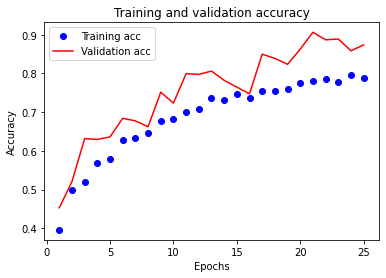

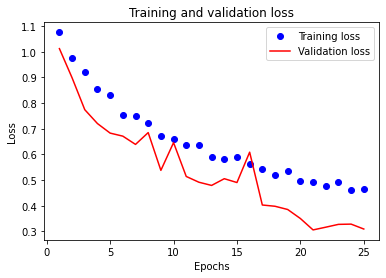

In [ ]:
# graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Evaluation

In [ ]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.0608 - accuracy: 0.2367
test_loss: 2.0608413219451904 
test_accuracy: 0.23666666448116302


# without Data Augmentation

## Normalization

In [ ]:
X2_train_norm = X2_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(X2_train_norm.shape))
print("y_train shape: {}".format(y2_train.shape))

x_train_norm shape: (1836, 28, 28, 3)
y_train shape: (1836,)


In [ ]:
X_val_norm = X_val/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(X_val_norm.shape))
print("y_train shape: {}".format(y_val.shape))

x_train_norm shape: (459, 28, 28, 3)
y_train shape: (459,)


## Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=256
n_dense=256
n_train_epoch=10

model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(n_dense, activation='relu'))
model1.add(keras.layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 256)       37120     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

In [ ]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 모델 훈련
history1 = model1.fit(
                    X2_train_norm,
                    y2_train,
#                     steps_per_epoch=(len(X2_train))/16,
                    epochs=10,
                    batch_size = 10,
                    validation_data = (X_val_norm, y_val),
                    validation_freq=1
                   )

Epoch 1/10
184/184 [==============================] - 1s 4ms/step - loss: 0.8562 - accuracy: 0.5768 - val_loss: 0.5163 - val_accuracy: 0.8061
Epoch 2/10
184/184 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7843 - val_loss: 0.3212 - val_accuracy: 0.8802
Epoch 3/10
184/184 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.8638 - val_loss: 0.2277 - val_accuracy: 0.9063
Epoch 4/10
184/184 [==============================] - 1s 4ms/step - loss: 0.2236 - accuracy: 0.9025 - val_loss: 0.1897 - val_accuracy: 0.9368
Epoch 5/10
184/184 [==============================] - 1s 3ms/step - loss: 0.1616 - accuracy: 0.9385 - val_loss: 0.2078 - val_accuracy: 0.9216
Epoch 6/10
184/184 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9472 - val_loss: 0.1520 - val_accuracy: 0.9434
Epoch 7/10
184/184 [==============================] - 1s 3ms/step - loss: 0.1304 - accuracy: 0.9521 - val_loss: 0.0974 - val_accuracy: 0.9608
Epoch 

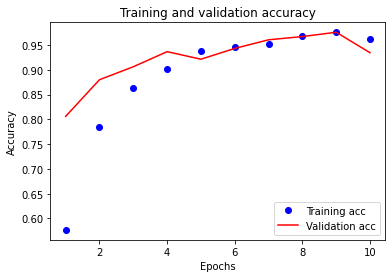

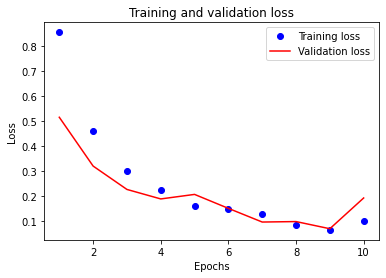

In [ ]:
# graph
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Evaluation

In [ ]:
# 모델 시험
test_loss, test_accuracy = model1.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.5601 - accuracy: 0.6333
test_loss: 2.560114622116089 
test_accuracy: 0.6333333253860474


# Review
- 처음에 다른 데이터 수집인이 만든 data set으로 각각 train data(600개)와 test data(300개)으로 학습을 하고 평가를 하였더니 학습을 하는 동안 정확도가 1이 나오고 평가에서는 최대 0.44로 과적합이었음.
- 과적합을 해결하고자 data augmentation으로 데이터 개수를 증가시키려 하였으나 실패
- 데이터 수집인이 다를 경우 data set의 차이가 있음을 인지하고 3개의 data set을 합치고 train, test, validation data를 분리하여 학습하였더니 과적합 문제가 해결되었음. => 다른 수집인의 data set을 test로 사용해야 하는 제한이었으므로 다시 다른 수집인의 데이터 전체를 test data로 설정
- test data를 고유한 수집인의 것으로 놔두고 data set을 더 추가하여 학습에 사용한 데이터를 2295개로 늘려 학습하였더니 정확도 0.6을 넘음. (epochs=10)
- 확실히 data augmentation은 데이터 양을 순수히 증가시키지 않는 한 정확도를 높이는 효과를 얻었음. 그러나 순수히 정확도를 높이는 좋은 방법은 데이터가 많은 것임.  
</br>
- 각각 다른 zip 파일을 다루는 가운데 여러가지 고려해야 할 사항들이 있었음.
    - 중복된 파일 이름 바꾸기
    - 여러 폴더에 있는 파일을 한 폴더로 옮기기
    - 데이터의 손상을 대비하여 복사하기